In [112]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os
from PIL import Image
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import distance_transform_edt
from skimage.morphology import skeletonize
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

C:\Users\Adars\AppData\Local\Temp\ipykernel_19464\2445692897.py:10: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt


In [2]:
def display(img):
    dpi = 80
    im_data = img

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


In [3]:

def preProcessing(myImage):
    grayImg = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print(f'The threshold valua applied to the image is: {ret} ')
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, horizontal_kernel, iterations=1)
    horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    im2 = myImage.copy()
    for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 255, 255), 0)
    im2, vertical_contours = seg_word(rect)
    return im2, vertical_contours


def seg_word(wordImage):
    grayImg = cv2.cvtColor(wordImage, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # create a Structuring Element size of 8*10 for the vertical contouring
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
    # apply Dilation for once only
    dilation = cv2.dilate(thresh2, vertical_kernel, iterations=1)
    #fingd the vertical contours
    vertical_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    word_img = wordImage.copy()
    # Run through each contour and extract the bounding box
    for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a rectangular from the top left to the bottom right with the
        # given Coordinates x,y and height and width
        rect = cv2.rectangle(word_img, (x, y), (x + w, y + h), (0, 255, 0), 0)
    # apply a Character Segmentation and return the output Image

    return word_img, vertical_contours

In [116]:
# Define the paths to the folders
italics_folder = 'output_images'
normal_folder = 'normal_images'
bold_folder = 'bold_images'

# Initialize empty lists for data and labels
X_data = []
Y_data = []

# Load images from italics folder
for i in range(1, 201):
    # Construct the image path
    image_path = os.path.join(italics_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(0)

# Load images from normal_folder
for i in range(1, 201):
    image_path = os.path.join(normal_folder, f'image_{i}.png')
    

    image = Image.open(image_path)
    image = np.array(image)

    X_data.append(image)
    Y_data.append(0)



# Load images from bold folder
for i in range(1, 201):
    # Construct the image path
    image_path = os.path.join(bold_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(1)

# Convert lists to numpy arrays
Y_data = np.array(Y_data)

In [117]:
print(len(X_data))
print(len(Y_data))

600
600


In [118]:
X_data1 = []
for i in range(len(X_data)):
    ## segmentation
    image = X_data[i]
    im2, vertical_contours = preProcessing(image)
    # display(im2)
    x = y = w = h = 0
    for cnt in vertical_contours:
        x, y, w, h = cv2.boundingRect(cnt)
    
    word = X_data[i][y:y+h, x:x+w]
    # display(word)
    X_data1.append(word)
    print(i)
    # display(im2)

The threshold valua applied to the image is: 141.0 
0
The threshold valua applied to the image is: 141.0 
1
The threshold valua applied to the image is: 142.0 
2
The threshold valua applied to the image is: 140.0 
3
The threshold valua applied to the image is: 141.0 
4
The threshold valua applied to the image is: 141.0 
5
The threshold valua applied to the image is: 141.0 
6
The threshold valua applied to the image is: 141.0 
7
The threshold valua applied to the image is: 140.0 
8
The threshold valua applied to the image is: 141.0 
9
The threshold valua applied to the image is: 142.0 
10
The threshold valua applied to the image is: 141.0 
11
The threshold valua applied to the image is: 142.0 
12
The threshold valua applied to the image is: 142.0 
13
The threshold valua applied to the image is: 140.0 
14
The threshold valua applied to the image is: 141.0 
15
The threshold valua applied to the image is: 141.0 
16
The threshold valua applied to the image is: 141.0 
17
The threshold valua 

In [119]:
print(X_data1[0].shape)

(33, 119, 3)


In [120]:
X_data = []
for i in range(len(X_data1)):
    image = X_data1[i]
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    X_data.append(binary_image)

In [121]:
X_data[0].shape

(33, 119)

In [122]:
## bicubic interpolation to make all the images of same sizeimport numpy as np
from PIL import Image

new_size = (64, 128)

resized_images = []
for image in X_data:
  resized_image = Image.fromarray(image).resize(new_size, Image.BICUBIC)
  resized_images.append(np.array(resized_image))

X_data = np.array(resized_images)

In [123]:
# Canny Edge detection 
  
# Defining all the parameters 
t_lower = 100 # Lower Threshold 
t_upper = 200 # Upper threshold 
aperture_size = 5 # Aperture size 
L2Gradient = True # Boolean 

edges = []
for img in X_data:
  
    # Applying the Canny Edge filter  
    # with Aperture Size and L2Gradient 
    edge = cv2.Canny(img, t_lower, t_upper, 
                     apertureSize = aperture_size,  
                     L2gradient = L2Gradient )  
    edge = cv2.bitwise_not(edge)

    edges.append(edge)


X_data_edges = np.array(edges)

In [124]:
# for images in X_data_edges:
#     display(images)

In [125]:
## Stroke width calculation:
stroke_widths = []

for edge in X_data_edges:
    
    
    # # display(edge)
    # padded_image = np.pad(edge, 2)
    # # display(padded_image)
    # distances = distance_transform_edt(padded_image)
    # # print(distances)
    # skeleton = skeletonize(padded_image)
    # center_pixel_distances = distances[skeleton]
    # # print(center_pixel_distances)
    # # display(skeleton)
    # # get the stroke width, twice the average of center pixel distances
    # stroke_width = np.mean(center_pixel_distances) * 2
    # stroke_widths.append(stroke_width)

    
    # display(edge)
    # padded_image = np.pad(edge, 2)
    # display(padded_image)
    distances = distance_transform_edt(edge)
    # print(distances)
    skeleton = skeletonize(edge)
    center_pixel_distances = distances[skeleton]
    # print(center_pixel_distances)
    # display(skeleton)
    # get the stroke width, twice the average of center pixel distances
    stroke_width = np.mean(center_pixel_distances) * 2
    stroke_widths.append(stroke_width)


unique_values = np.unique(stroke_widths)
print("Unique values:", unique_values)
# # show the image
# plt.figure(figsize=(10,10))
# plt.imshow(padded_image, cmap="gray")

Unique values: [3.51405131 3.61156376 3.63333161 3.67357907 3.79787094 3.81305094
 3.82620492 3.84224209 3.8924181  3.89341036 3.89366089 3.90369304
 3.92522796 3.93410253 3.94735849 3.94773197 3.96774132 3.98794885
 3.98883737 3.9938832  3.99850935 4.00077943 4.01951805 4.02446853
 4.03230512 4.03611412 4.03846664 4.04030384 4.04047877 4.04120926
 4.04946396 4.05122233 4.06940992 4.08344423 4.09368564 4.09403215
 4.09473604 4.11697938 4.12679766 4.13051451 4.13078996 4.13599749
 4.13653132 4.14190743 4.14388118 4.14521645 4.1549414  4.16084836
 4.1700987  4.17472183 4.18679009 4.19182251 4.19297339 4.19903058
 4.20205384 4.20240257 4.21139861 4.21235033 4.21966598 4.22571753
 4.22729762 4.22836853 4.24088492 4.24187279 4.2440367  4.2444043
 4.25285577 4.25516222 4.25685495 4.2640278  4.26528039 4.2673745
 4.26837518 4.27239356 4.27418064 4.27604817 4.27707055 4.27842753
 4.27984515 4.28445927 4.28546649 4.28608713 4.29181286 4.29305255
 4.29481221 4.29880968 4.30004109 4.30383158 4.30

In [126]:
#Average Character height calculation:

avg_char_heights = []
for edge in edges:
    contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]
    
    
    heights = [cv2.boundingRect(cnt)[3] for cnt in filtered_contours]
    
    if heights:
        avg_char_heights.append(sum(heights) / len(heights))
    else:
        avg_char_heights.append(0)




In [127]:
unique_values = np.unique(avg_char_heights)
print("Unique values:", unique_values)
print(len(unique_values))

Unique values: [ 92.5 128. ]
2


In [128]:


# Combine the features into a single 2D array
features = np.column_stack((stroke_widths, avg_char_heights))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y_data, test_size=0.2, random_state=42)



In [129]:
# Flatten the images to 1D
X_data_flattened = X_data.reshape(X_data.shape[0], -1)

# Step 3: Concatenate features
# Combine flattened image data with other features
X_combined = np.hstack((X_data_flattened, features))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, Y_data, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 5: Evaluate the classifier
y_pred = knn.predict(X_test_scaled)

# Print classification report and accuracy
print("Classification Report:\n", classification_report(y_pred, y_test))
print("Accuracy Score:", accuracy_score(y_pred, y_test))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       102
           1       0.44      1.00      0.61        18

    accuracy                           0.81       120
   macro avg       0.72      0.89      0.74       120
weighted avg       0.92      0.81      0.83       120

Accuracy Score: 0.8083333333333333


In [131]:
# len(X_train)

In [132]:
# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)


In [109]:
# # 
# # Train the KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)



In [110]:
# # Evaluate the model on the test set
# accuracy = knn.score(X_test_scaled, y_test)
# print(f"Accuracy: {accuracy:.2f}")

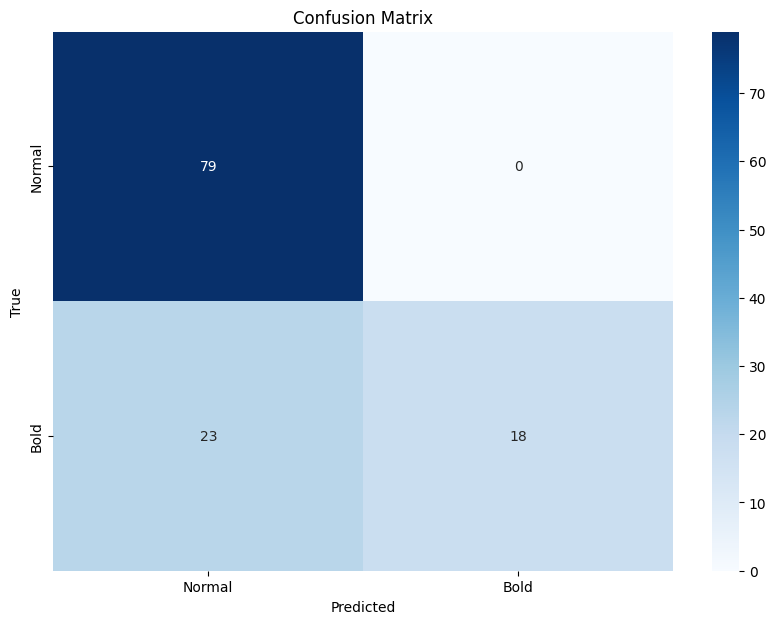

In [133]:
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Bold'], yticklabels=['Normal', 'Bold'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

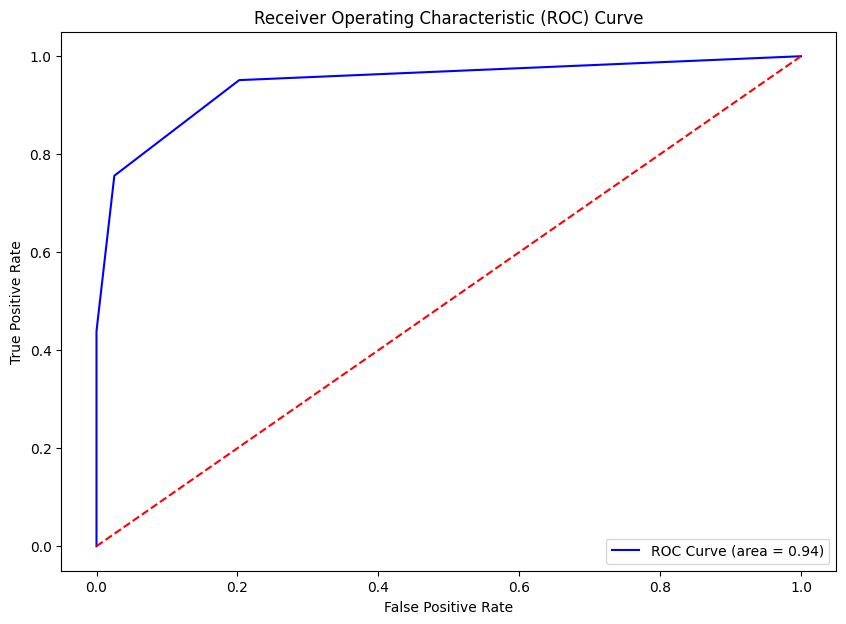

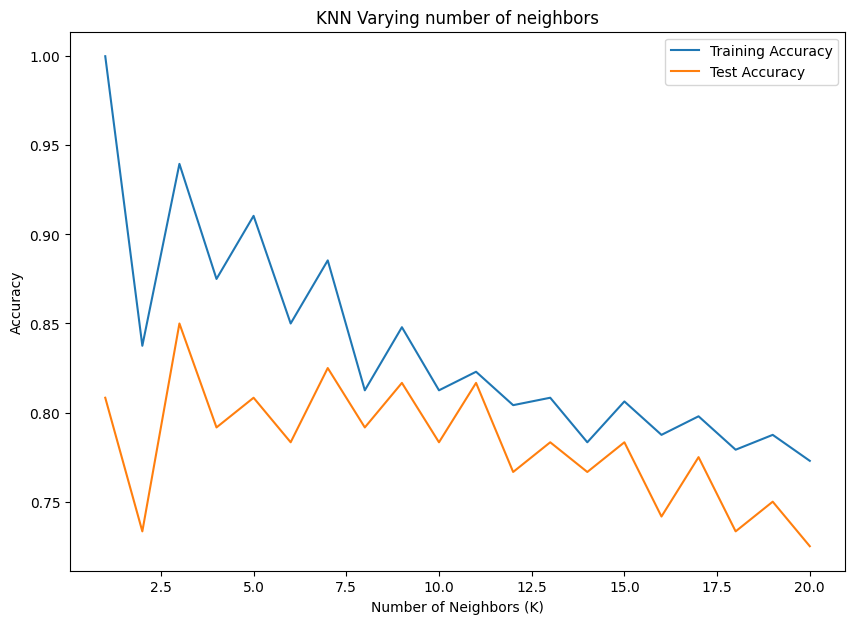

In [134]:
# ROC Curve
y_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy Plot
k_range = range(1, 21)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 7))
plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.legend()
plt.show()